In [1]:
from tensorflow import keras
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("./data/boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

- 보스턴 집값 데이터 독립변수
    - CRIM : 인구 1명당 범죄 발생 수
    - ZN : 25,000 평당 피트 이상의 주거 구역 비중
    - INDUS : 소매업 외 상업이 차지하는 면적 비율
    - CHAS : 찰스강 위치 변수(1 : 강 주변, 0 : 이외)
    - NOX : 일산화질소 농도
    - RM : 집의 평균 방 수
    - AGE : 1940년 이전에 지어진 비율
    - DIS : 5가지 보스턴 시 고용 시설까지의 거리
    - RAD : 순환 고속도로의 접근 용이성
    - TAX : $10,000당 부동산 세율 총계
    - PTRATIO : 지역별 학생과 교사 비율
    - B : 지역별 흑인 비율
    - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율(%)
    
- 종속변수
    - PRICE : 가격(단위 : $1,000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: >

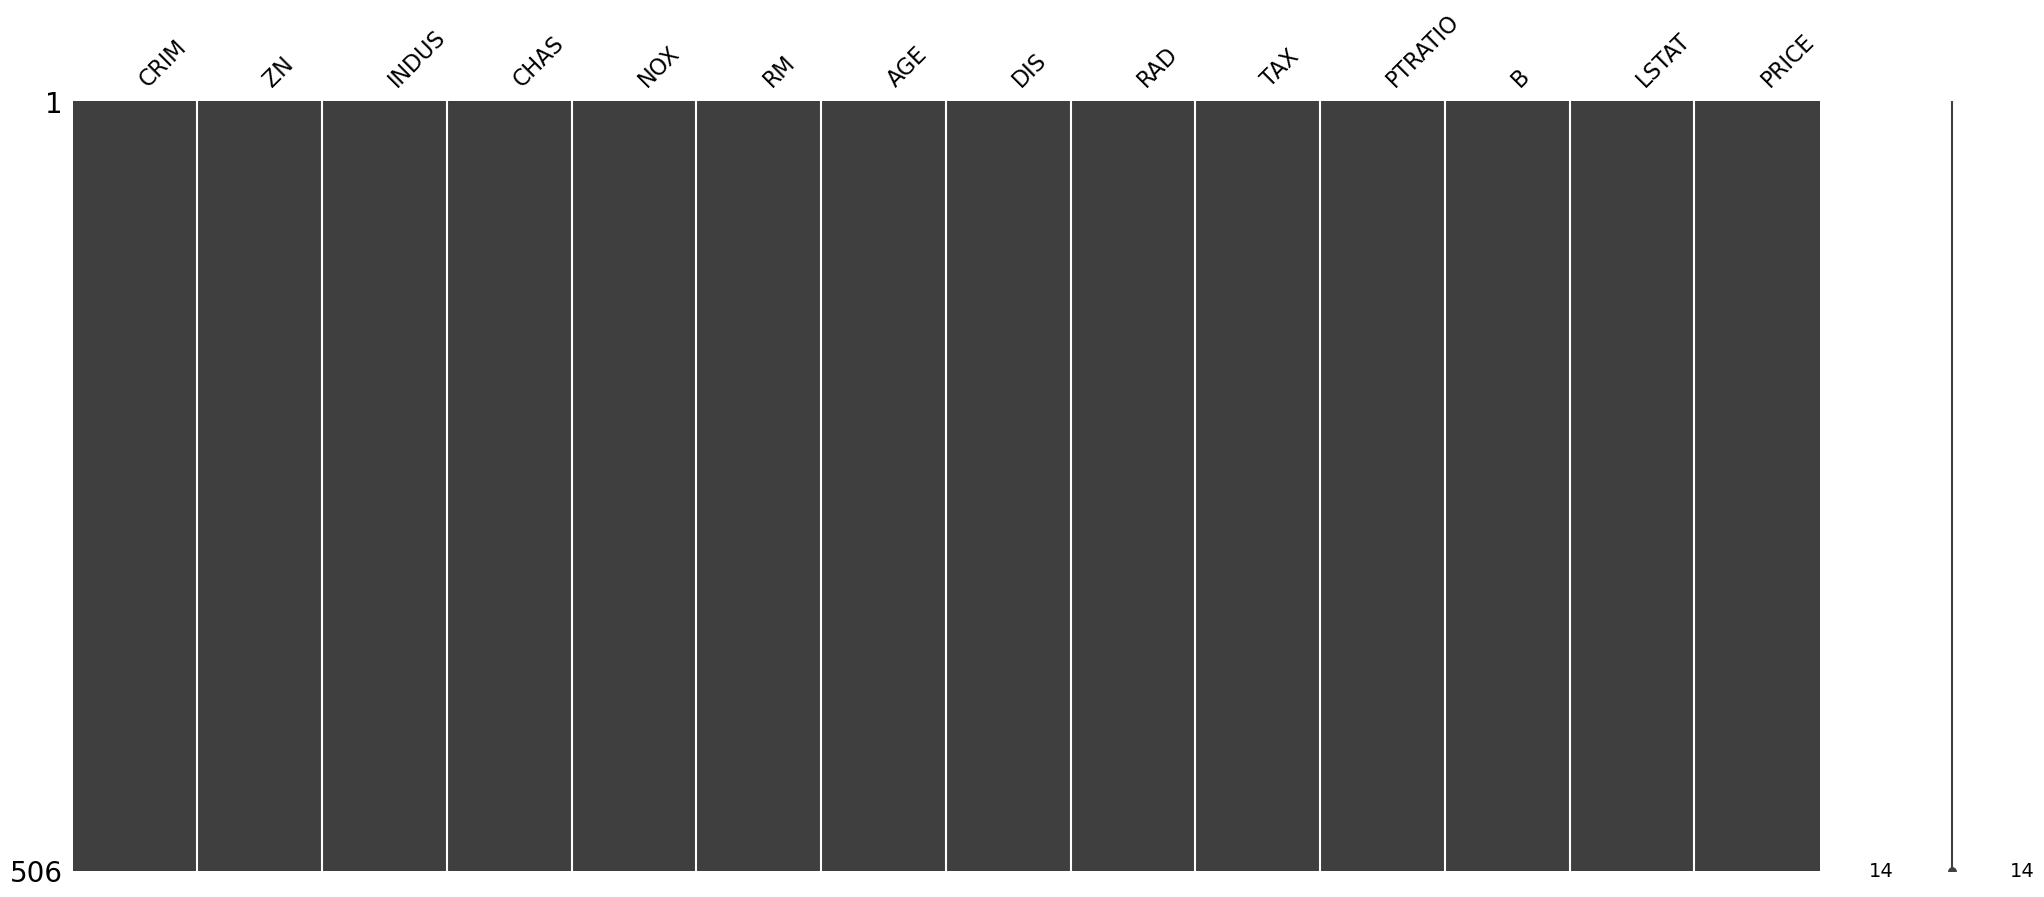

In [6]:
# 결측치 시각화
msno.matrix(df)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df["PRICE"].value_counts()

PRICE
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [22]:
df["PRICE"].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

# Case1

In [8]:
x = df.drop("PRICE", axis = 1)
y = df["PRICE"]

In [9]:
x.shape, y.shape

((506, 13), (506,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state = 11)

In [14]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

In [15]:
# 스케일링
mm = MinMaxScaler()
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

In [17]:
x_sub.shape, x_val.shape, y_sub.shape, y_val.shape

((323, 13), (81, 13), (323,), (81,))

In [23]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation = "relu", input_shape = (13,)))
model.add(keras.layers.Dense(32, activation = "relu"))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "linear"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = "mean_squared_error", optimizer = "SGD", metrics = ["mse"])

In [42]:
history = model.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, validation_split = 0.25)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: inf - mse: inf - val_loss: inf - val_mse: inf
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

Epoch 41/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76671545533756433648942124630016.0000 - mse: 76796330856857055672355296116736.0000 - val_loss: 46635759366914579510783687786496.0000 - val_mse: 46635759366914579510783687786496.0000
Epoch 42/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40166947212958331010948603576320.0000 - mse: 40232321085579811698200014749696.0000 - val_loss: 24431694473139557594407186202624.0000 - val_mse: 24431694473139557594407186202624.0000
Epoch 43/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21042787676414683735962194804736.0000 - mse: 21077034127032726951223271358464.0000 - val_loss: 12799350999442434558554800128000.0000 - val_mse: 12799350999442434558554800128000.0000
Epoch 44/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11023961226382617820714900652032.0000 - mse: 11041902894471518532296715010048.0000 - val_loss: 6705365086931882219708191080448.0000 - val_mse: 6705365086931882219708191080448.0000
Epoch 45/100
16/16 ━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151670660997913239355392.0000 - mse: 151917512300688670982144.0000 - val_loss: 92254220754051548577792.0000 - val_mse: 92254220754051548577792.0000
Epoch 73/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79457701780040275984384.0000 - mse: 79587018139740592406528.0000 - val_loss: 48330433444322006269952.0000 - val_mse: 48330433444322006269952.0000
Epoch 74/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41626541672204498632704.0000 - mse: 41694289321399033004032.0000 - val_loss: 25319487054856247574528.0000 - val_mse: 25319487054856247574528.0000
Epoch 75/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21807433698444845252608.0000 - mse: 21842926567108152131584.0000 - val_loss: 13264450856594415026176.0000 - val_mse: 13264449730694508183552.0000
Epoch 76/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11424545761228845219840.0000 - mse: 11443139998190351155200.0000 - val_loss: 6949020448035470049280.0000 - val_mse: 69490204480

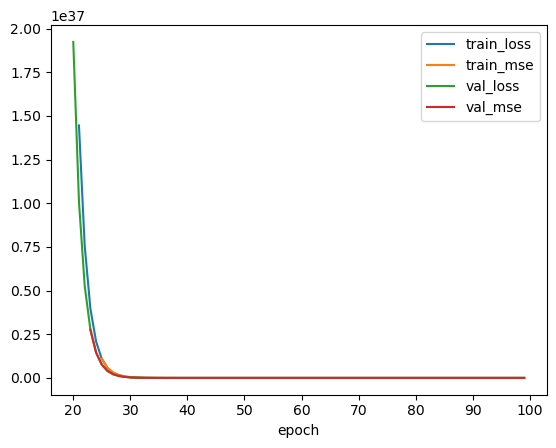

In [43]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["mse"], label = "train_mse")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_mse"], label = "val_mse")

plt.legend()
plt.xlabel("epoch")
plt.show()